In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
### Cargamos los datos CSV 
data = pd.read_csv("./Maldon.csv", sep=";")
data.head()

,Investiga,Id,Moneda,Precio,Unidades vendidas,Venta Diaria Promedio,IdSeller,Nickname,Stock,Exposicion,T. Oficial,Condición,Cuotas,Envío Gratis,Días publicados,Reputación,Ubicación,Envío Flex,Envío Full
0,Juego De Mesa El Camarero Maldón,MLA924668309,ARS,3330,500,7000,29693465,JUEGOSMALDON,68,Premium,Maldon,Nuevo,6,No,301,Platinum,Capital Federal,Si,Si
1,Juego De Mesa El Erudito Maldón,MLA924669969,ARS,5360,500,11300,29693465,JUEGOSMALDON,17,Premium,Maldon,Nuevo,6,Si,301,Platinum,Capital Federal,Si,Si
2,Juego De Mesa El Ilustrado Maldón,MLA924668610,ARS,5360,200,4400,29693465,JUEGOSMALDON,20,Premium,Maldon,Nuevo,6,Si,301,Platinum,Capital Federal,Si,Si
3,Juego De Mesa Pescadores Maldón,MLA924338255,ARS,3330,100,1200,478972008,DEMAVISIONCOMERCIALSRL,19,Premium,,Nuevo,6,No,303,Platinum,Interior,No,Si
4,Juego De Mesa El Cinéfilo Maldón,MLA924669793,ARS,4730,100,1700,29693465,JUEGOSMALDON,19,Premium,Maldon,Nuevo,6,Si,301,Platinum,Capital Federal,Si,Si


In [3]:
#### Miramos como estan compuestos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Investiga              1622 non-null   object
 1   Id                     1622 non-null   object
 2   Moneda                 1622 non-null   object
 3   Precio                 1622 non-null   int64 
 4   Unidades vendidas      1622 non-null   int64 
 5   Venta Diaria Promedio  1622 non-null   int64 
 6   IdSeller               1622 non-null   int64 
 7   Nickname               1622 non-null   object
 8   Stock                  1622 non-null   int64 
 9   Exposicion             1622 non-null   object
 10  T. Oficial             1622 non-null   object
 11  Condición              1622 non-null   object
 12  Cuotas                 1622 non-null   int64 
 13  Envío Gratis           1622 non-null   object
 14  Días publicados        1622 non-null   int64 
 15  Reputación           

In [4]:
#### Miramos como estan compuestos los datos numericos

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Precio,1622.0,4.947800e+03,2.479224e+03,250.0,3330.0,4730.0,5877.0,20185.0
Unidades vendidas,1622.0,1.109125e+01,5.596291e+01,0.0,0.0,0.0,5.0,500.0
Venta Diaria Promedio,1622.0,1.348705e+02,8.122032e+02,0.0,0.0,0.0,40.0,13200.0
IdSeller,1622.0,1.302153e+08,1.299439e+08,923694.0,26447966.0,92209428.0,178146766.0,720016625.0
Stock,1622.0,3.966683e+02,7.979548e+02,1.0,1.0,4.0,13.0,2996.0
Cuotas,1622.0,1.113810e+01,2.235525e+00,3.0,12.0,12.0,12.0,12.0
Días publicados,1622.0,4.551942e+02,4.960821e+02,2.0,104.5,284.0,652.0,2251.0


In [5]:
### Cambiamos el nombre de una columna

data = data.rename(columns={"Investiga":"Producto"})

* ### Simple viste no tenemos datos repetitivos. es decir filas con los mismo valores
----

In [6]:
#### Veremos si el data set contiene algunos que otros datos N/A
print(data.isna().sum())
### que nos diga cuantas filas y columnas componen el dataset
print(f"Numeros de filas{data.shape}columnas")

Producto                 0
Id                       0
Moneda                   0
Precio                   0
Unidades vendidas        0
Venta Diaria Promedio    0
IdSeller                 0
Nickname                 0
Stock                    0
Exposicion               0
T. Oficial               0
Condición                0
Cuotas                   0
Envío Gratis             0
Días publicados          0
Reputación               5
Ubicación                5
Envío Flex               5
Envío Full               5
dtype: int64
Numeros de filas(1622, 19)columnas


* ### Vemos que solamente tenemos 5 filas con datos nulos en las columnas de envios, reputacion y ubicacion
-----
* ### Pasaremos valores TxT a valores numericos, por ejemplo (Envío Gratis,Envío Flex,Envío Full)

In [7]:
#### Dumificamos dichos valores 
dummy_Envio_gratis = pd.get_dummies(data["Envío Gratis"], prefix="Envio-gratis")
dummy_Envio_flex = pd.get_dummies(data["Envío Flex"], prefix="Envio-flex")
dummy_Envio_full = pd.get_dummies(data["Envío Full"], prefix="Envio-full")

In [8]:
#### Concatenamos los datos dumificados al data set correspondiente
data = pd.concat([data,dummy_Envio_gratis,dummy_Envio_flex,dummy_Envio_full], axis=1)
data.head()

,Producto,Id,Moneda,Precio,Unidades vendidas,Venta Diaria Promedio,IdSeller,Nickname,Stock,Exposicion,...,Reputación,Ubicación,Envío Flex,Envío Full,Envio-gratis_No,Envio-gratis_Si,Envio-flex_No,Envio-flex_Si,Envio-full_No,Envio-full_Si
0,Juego De Mesa El Camarero Maldón,MLA924668309,ARS,3330,500,7000,29693465,JUEGOSMALDON,68,Premium,...,Platinum,Capital Federal,Si,Si,1,0,0,1,0,1
1,Juego De Mesa El Erudito Maldón,MLA924669969,ARS,5360,500,11300,29693465,JUEGOSMALDON,17,Premium,...,Platinum,Capital Federal,Si,Si,0,1,0,1,0,1
2,Juego De Mesa El Ilustrado Maldón,MLA924668610,ARS,5360,200,4400,29693465,JUEGOSMALDON,20,Premium,...,Platinum,Capital Federal,Si,Si,0,1,0,1,0,1
3,Juego De Mesa Pescadores Maldón,MLA924338255,ARS,3330,100,1200,478972008,DEMAVISIONCOMERCIALSRL,19,Premium,...,Platinum,Interior,No,Si,1,0,1,0,0,1
4,Juego De Mesa El Cinéfilo Maldón,MLA924669793,ARS,4730,100,1700,29693465,JUEGOSMALDON,19,Premium,...,Platinum,Capital Federal,Si,Si,0,1,0,1,0,1


-----
* # Graficamos los datos numericos que tenemos en el data set para que se pueda entender mejor de como se comportan los datos.

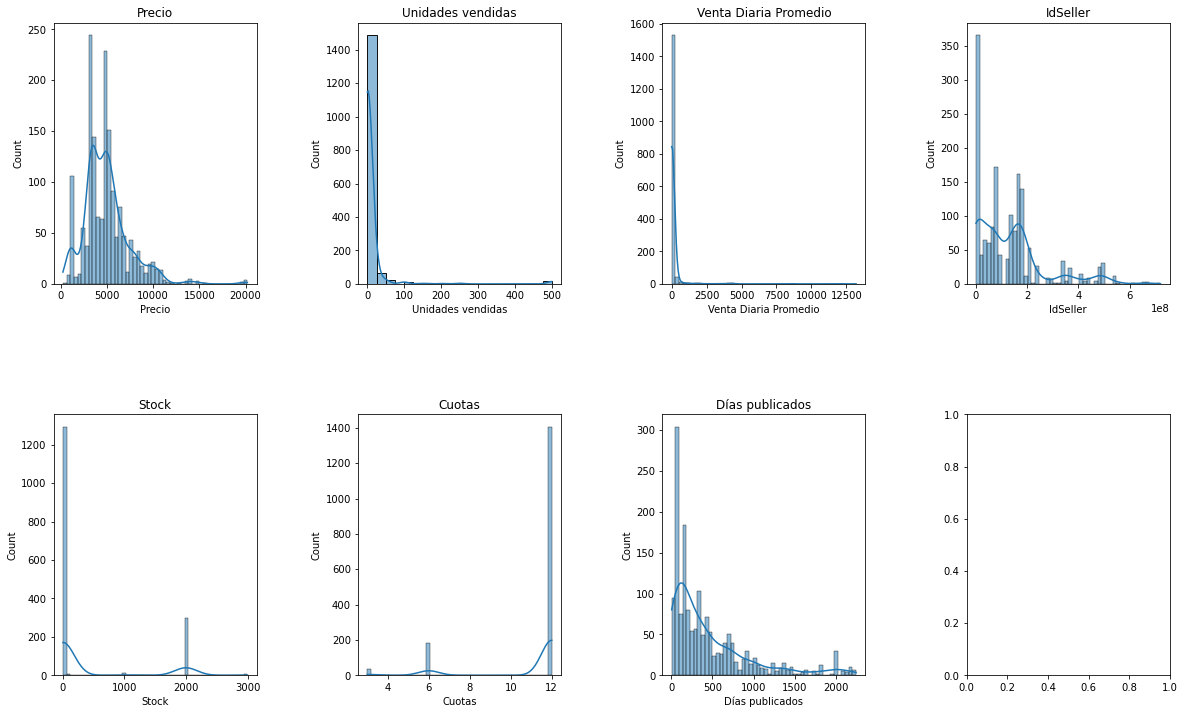

In [9]:
col_num = ["Precio","Unidades vendidas","Venta Diaria Promedio","IdSeller" , "Stock" , "Cuotas","Días publicados"]

fig,ax = plt.subplots(nrows=2, ncols=4 , figsize=(20,12))
fig.subplots_adjust(wspace=0.5 , hspace=0.5)


for i, col in enumerate(col_num):
    if col == "Unidades vendidas":
        nbins = 20
        
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i//4][i%4], bins=nbins, kde=True)
    ax[i//4][i%4].set_title(col)

* ### "PRECIO": tiene una distribucion sesgada a la derecha, la mayor parte de la concentracion esta entre 2500 y 7500 PESOS ARS



* ### "UNIDADES VENDIDAS": Esta también sesgada a la derecha, la mayor parte de la concentración esta entre 1 y 25 unidades vendidas

* ### "VENTAS DIARIAS PROMEDIO": Igual que las dos ateriores vemos que esta sesgada hacia la derecha. la mayor concentración esta entre 1 y 25 ventas diarias "PROMEDIO".

* ### "CUOTAS": Esta es todo lo contrario a los demas histogramas, Tiene un seso hacía la izquierda, Es decir que la mayor parte de las cuotas se hacen en 12 y luego en 6.

* ### "DIAS PUBLICADOS": Tiene un sesgo hacia la derecha, la mayor concentración de los dias publicados estan entre 1 y 200 dias publicados.
----




---
---

In [10]:
data.head()

,Producto,Id,Moneda,Precio,Unidades vendidas,Venta Diaria Promedio,IdSeller,Nickname,Stock,Exposicion,...,Reputación,Ubicación,Envío Flex,Envío Full,Envio-gratis_No,Envio-gratis_Si,Envio-flex_No,Envio-flex_Si,Envio-full_No,Envio-full_Si
0,Juego De Mesa El Camarero Maldón,MLA924668309,ARS,3330,500,7000,29693465,JUEGOSMALDON,68,Premium,...,Platinum,Capital Federal,Si,Si,1,0,0,1,0,1
1,Juego De Mesa El Erudito Maldón,MLA924669969,ARS,5360,500,11300,29693465,JUEGOSMALDON,17,Premium,...,Platinum,Capital Federal,Si,Si,0,1,0,1,0,1
2,Juego De Mesa El Ilustrado Maldón,MLA924668610,ARS,5360,200,4400,29693465,JUEGOSMALDON,20,Premium,...,Platinum,Capital Federal,Si,Si,0,1,0,1,0,1
3,Juego De Mesa Pescadores Maldón,MLA924338255,ARS,3330,100,1200,478972008,DEMAVISIONCOMERCIALSRL,19,Premium,...,Platinum,Interior,No,Si,1,0,1,0,0,1
4,Juego De Mesa El Cinéfilo Maldón,MLA924669793,ARS,4730,100,1700,29693465,JUEGOSMALDON,19,Premium,...,Platinum,Capital Federal,Si,Si,0,1,0,1,0,1


In [11]:
col_cat = ["Moneda","Exposicion","Condición","Reputación",
           "Ubicación","Envío Flex","Envío Full","Envío Gratis"]

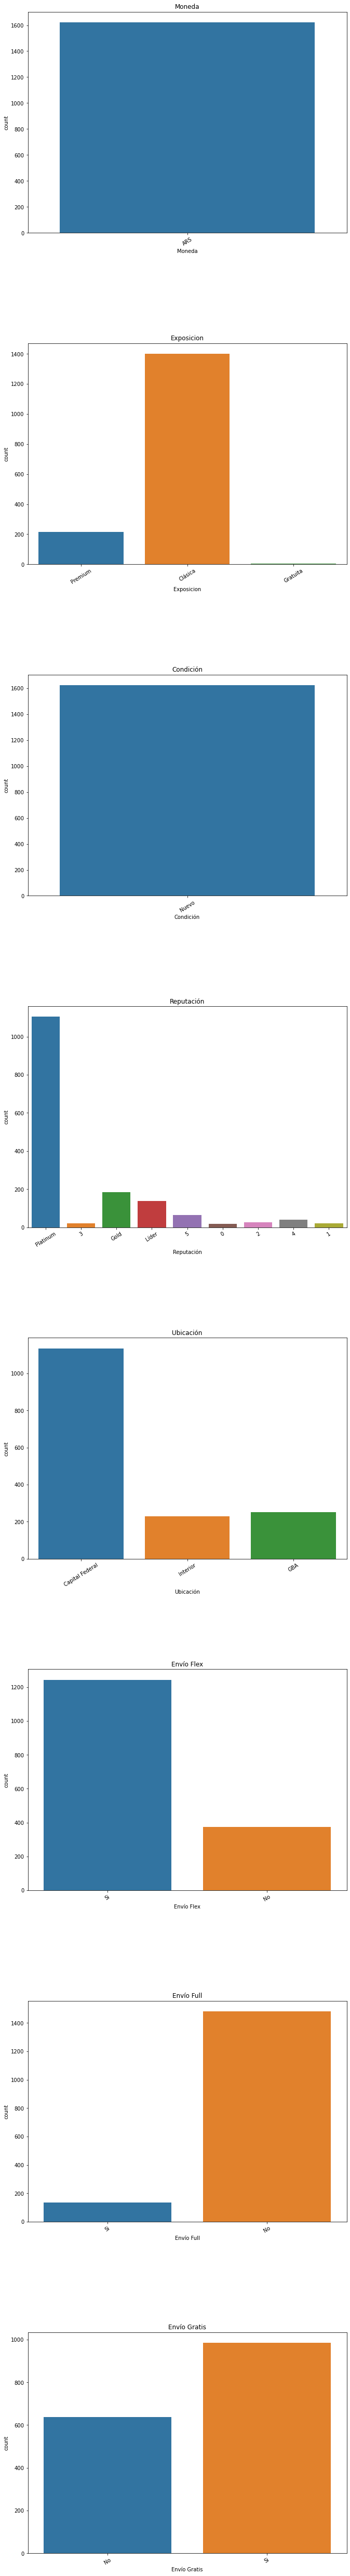

In [12]:
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(11,90))
fig.subplots_adjust(hspace=0.5)

for i , col in enumerate(col_cat):
    sns.countplot(x=col , data=data , ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=32)

* # RESUMEN DATOS CATEGORICOS:
    * ### MONEDA = solamente "ARS" (Peso Argentino)
    * ### EXPOSICIÓN = Mayormente fue en versión "CLASICA" alrededor de casi 1400 y unos 200 en exposición "PREMIUM" solo 2 o 3 "GRATUITA".
    * ### CONDICIÓN = Nuevo. Todos los objetos vendidos son "NUEVOS".
    * ### REPUTACIÓN = La mayor "REPUTACIÓN" que tienen las compras es "PLATINUM" (alrededor de 1100) luego "GOLD" Y "LIDER". 
    * ### UBICACIÓN = La mayor ubicación donde se vendio fue en "CAPITAL FEDERAL".
    * ### ENVÍO FLEX = Mayormente "SI" (1000 que si y 300 que no).
    * ### ENVÍO FULL = Casi todos fueron que "NO" (casi 1500).
    * ### ENVÍO GRATIS = Mayormente "SI" pero no es tanta la diferencia (1000 que SI y 600 que no).
------
-----

# CORRELACIÓN

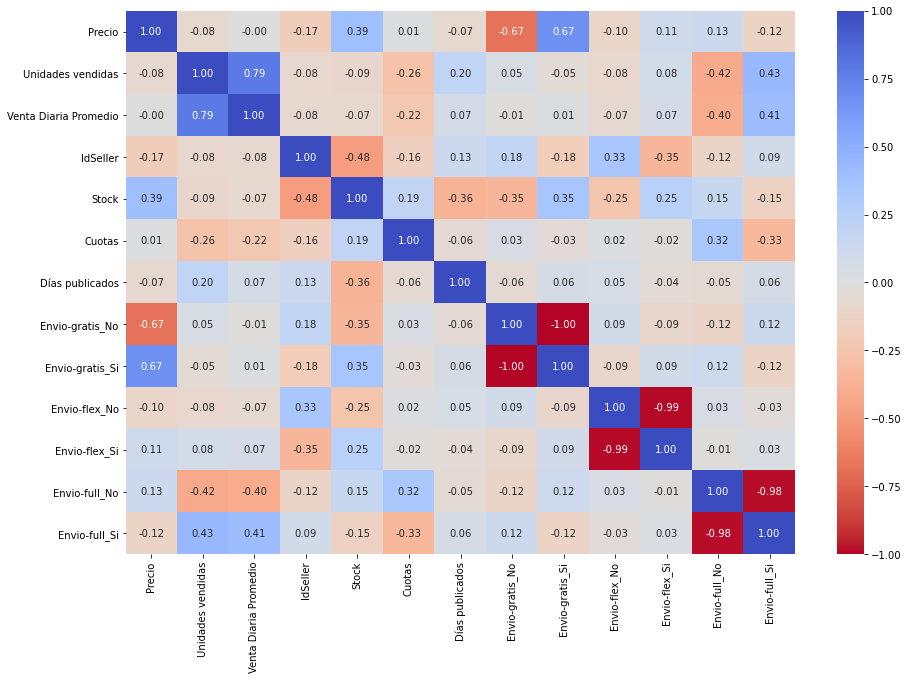

In [13]:
correlacion = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlacion, annot=True , fmt=".2f" ,  cmap=plt.cm.coolwarm_r)
plt.show()

* ## OBSERVACIÓN: 
    * ### vemos que hay dos variables que estan altamente correlacionadas por obvias razones "Venta diaria promedio y Unidades Vendidas". Pero las que si estan correlacionadas y no era tanto de esperarse son "Envio full SI" y unidades vendidas y ventas diaria promedio. Por ultim el "Stock y Precio" son las de mayor correlación despues de las anteriores nombradas.
-----
----



* # SEGMENTACIÓN DE DATOS
    * ## Ubicación :

In [14]:
### Calcular la suma de ventas por ubicacion
ventas_ubicacion = data.groupby("Ubicación")["Unidades vendidas"].sum()
ventas_ubicacion

Ubicación
Capital Federal    15903
GBA                 1414
Interior             668
Name: Unidades vendidas, dtype: int64

In [15]:
# Calcular la cantidad de vendedores que ofrecen envío flex, por ubicación
envio_felx_ubicacion = data.groupby('Ubicación')[['Envio-flex_No', 'Envio-flex_Si']].sum()
envio_felx_ubicacion

,Envio-flex_No,Envio-flex_Si
Ubicación,,
Capital Federal,90.0,1045.0
GBA,93.0,159.0
Interior,191.0,39.0


In [16]:
# Calcular la cantidad de vendedores que ofrecen envío gratis, por ubicación
envio_gratis_ubicacion = data.groupby('Ubicación')[['Envio-gratis_No', 'Envio-gratis_Si']].sum()
envio_gratis_ubicacion

,Envio-gratis_No,Envio-gratis_Si
Ubicación,,
Capital Federal,406.0,729.0
GBA,135.0,117.0
Interior,94.0,136.0


In [17]:
# Calcular la cantidad de vendedores que ofrecen envío Full, por ubicación
envio_full_ubicacion = data.groupby('Ubicación')[['Envio-full_No', 'Envio-full_Si']].sum()
envio_full_ubicacion

,Envio-full_No,Envio-full_Si
Ubicación,,
Capital Federal,1069.0,66.0
GBA,209.0,43.0
Interior,204.0,26.0


In [18]:
cuota_ubicacion = data.groupby("Ubicación")["Cuotas"].value_counts()
print(cuota_ubicacion)

Ubicación        Cuotas
Capital Federal  12        999
                 6         134
                 3           2
GBA              12        231
                 3          13
                 6           8
Interior         12        171
                 6          40
                 3          19
Name: Cuotas, dtype: int64


In [19]:
reputacion_por_ubicacion = data.groupby("Ubicación")["Stock"].mean()
reputacion_por_ubicacion

Ubicación
Capital Federal    564.680176
GBA                  5.539683
Interior             4.300000
Name: Stock, dtype: float64

In [22]:
data

,Producto,Id,Moneda,Precio,Unidades vendidas,Venta Diaria Promedio,IdSeller,Nickname,Stock,Exposicion,...,Reputación,Ubicación,Envío Flex,Envío Full,Envio-gratis_No,Envio-gratis_Si,Envio-flex_No,Envio-flex_Si,Envio-full_No,Envio-full_Si
0,Juego De Mesa El Camarero Maldón,MLA924668309,ARS,3330,500,7000,29693465,JUEGOSMALDON,68,Premium,...,Platinum,Capital Federal,Si,Si,1,0,0,1,0,1
1,Juego De Mesa El Erudito Maldón,MLA924669969,ARS,5360,500,11300,29693465,JUEGOSMALDON,17,Premium,...,Platinum,Capital Federal,Si,Si,0,1,0,1,0,1
2,Juego De Mesa El Ilustrado Maldón,MLA924668610,ARS,5360,200,4400,29693465,JUEGOSMALDON,20,Premium,...,Platinum,Capital Federal,Si,Si,0,1,0,1,0,1
3,Juego De Mesa Pescadores Maldón,MLA924338255,ARS,3330,100,1200,478972008,DEMAVISIONCOMERCIALSRL,19,Premium,...,Platinum,Interior,No,Si,1,0,1,0,0,1
4,Juego De Mesa El Cinéfilo Maldón,MLA924669793,ARS,4730,100,1700,29693465,JUEGOSMALDON,19,Premium,...,Platinum,Capital Federal,Si,Si,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Juego De Mesa El Switcher De Maldón (15223),MLA915844217,ARS,3455,0,0,128276579,ELPATIO ONLINE,1,Clásica,...,1,Capital Federal,No,No,1,0,1,0,1,0
1618,Respuestas Abiertas Imágenes Didactikids,MLA844167183,ARS,1500,1,0,75501715,DIDACTIKIDSONLINE,2,Clásica,...,1,Capital Federal,Si,No,1,0,0,1,1,0
1619,El Switcher Juego De Estrategia Ingenio +8 Año...,MLA760729337,ARS,3085,2,0,75501715,DIDACTIKIDSONLINE,1,Clásica,...,1,Capital Federal,Si,No,1,0,0,1,1,0
1620,El Macanudo Juego De Mesa +8 Años Didactikids,MLA760704724,ARS,4660,0,0,75501715,DIDACTIKIDSONLINE,1,Clásica,...,1,Capital Federal,Si,No,0,1,0,1,1,0


In [23]:
data_final = "datos_procesados_maldon.xlsx"

In [24]:
data.to_excel(data_final, index=False)